In [1]:
using HDF5

  likely near /home/iapellaniz/.julia/v0.5/IJulia/src/kernel.jl:6
in gc_protect_handle at 
  likely near /home/iapellaniz/.julia/v0.5/IJulia/src/kernel.jl:6
  likely near /home/iapellaniz/.julia/v0.5/IJulia/src/kernel.jl:6
in gc_protect_handle at /home/iapellaniz/.julia/v0.5/ZMQ/src/ZMQ.jl
  likely near /home/iapellaniz/.julia/v0.5/IJulia/src/kernel.jl:6
in gc_protect_handle at /home/iapellaniz/.julia/v0.5/ZMQ/src/ZMQ.jl
  likely near /home/iapellaniz/.julia/v0.5/IJulia/src/kernel.jl:6
in gc_protect_handle at /home/iapellaniz/.julia/v0.5/ZMQ/src/ZMQ.jl


In [25]:
# File name for the data shown in the thesis, which references to papers projects
F_NAME = "plotsData.h5"
F_ATTRS = ["Author", "Description"]

# Plots grouped by paper projects
G_ATTRS = ["Description", "DOI"]

# Data grouped by plots
PG_ATTRS = ["Description", "Type", "DS_names"]

3-element Array{ASCIIString,1}:
 "Description"
 "Type"       
 "DS_names"   

In [126]:
h5root = h5open("plotsData.h5", "r+")

HDF5 data file: plotsData.h5

In [127]:
read(attrs(h5root)["Description"])

"File to store all data for plots of my PhD thesis"

In [128]:
names(attrs(h5root))

2-element Array{ByteString,1}:
 "Author"     
 "Description"

In [68]:
dump(h5root)

HDF5.HDF5File len 1
  VicinityDicke: HDF5.HDF5Group len 1
    PrecisionOverTheta: HDF5.HDF5Group len 2
      precision: HDF5Dataset (200,) : [0.0,0.0150389,0.0595792,0.131944,0.229501 
      theta: HDF5Dataset (200,) : [0.0,0.000150754,0.000301508,0.000452261,0.000603015 


In [53]:
gvd = h5root["VicinityDicke"]

HDF5 group: /VicinityDicke (file: plotsData.h5)

In [54]:
gpt = gvd["PrecisionOverTheta"]

HDF5 group: /VicinityDicke/PrecisionOverTheta (file: plotsData.h5)

In [55]:
attrs(gpt)

0-element Array{ByteString,1}

In [58]:
indx = indmax(read(gpt["precision"]))

39

In [59]:
precision_max = read(gpt["precision"])[39]

3.257452045807663

In [60]:
theta_max = read(gpt["theta"])[39]

0.005728643216080402

In [63]:
attrspt = attrs(gpt)
attrspt["Description"] = "Data describing the evolution of the precision."
attrspt["Type"] = "2D"
attrspt["precision_max"] = precision_max
attrspt["theta_max"] = theta_max

0.005728643216080402

In [64]:
names(attrspt)

4-element Array{ByteString,1}:
 "Description"  
 "Type"         
 "precision_max"
 "theta_max"    

In [65]:
close(h5root)

In [69]:
using PyPlot

sys:1: PyGIWarning: Gtk was imported without specifying a version first. Use gi.require_version('Gtk', '3.0') before import to ensure that the right version gets loaded.


In [70]:
png = imread("data/data-spsq-4-blender.png")
data = (png[:,:,1]+png[:,:,2]+png[:,:,3])/3
# deal with the alpha chanel
achanel = png[:,:,4]
map!((x)->if x==0 NaN else 0 end,achanel)
data = data+achanel
data = (data - minimum(data))/(maximum(data)-minimum(data))

1024×1024 Array{Float32,2}:
 0.527094    0.527094    0.527094    …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.522168    0.522168    0.522168       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.517241    0.517241    0.517241       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.507389    0.507389    0.507389       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.502463    0.502463    0.502463       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.497537    0.497537    0.497537    …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.487685    0.487685    0.487685       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.482759    0.482759    0.482759       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.472906    0.472906    0.472906       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.46798     0.46798     0.46798        NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.458128    0.458128    0.458128    …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.453202    0.453202    0.453202       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.44335     0.44335     0.44335        NaN  NaN  NaN  NaN  NaN  NaN  NaN
 ⋮        

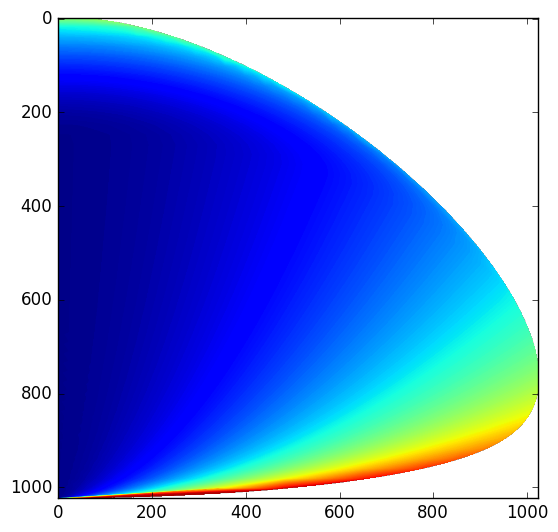

PyObject <matplotlib.image.AxesImage object at 0x7f371c79b8d0>

In [73]:
imshow(data)

In [74]:
h5root

HDF5 data file: plotsData.h5

In [75]:
g_create(h5root, "OptimalBound")

HDF5 group: /OptimalBound (file: plotsData.h5)

In [76]:
gob = h5root["OptimalBound"]

HDF5 group: /OptimalBound (file: plotsData.h5)

In [77]:
gss = g_create(gob, "SpinSqueezing")

HDF5 group: /OptimalBound/SpinSqueezing (file: plotsData.h5)

In [79]:
attrs(gss)["Description"] = "Data to plot the optimal bound for the precision"
attrs(gss)["Type"] = "3D"
attrs(gss)["XLim"] = [0,2]
attrs(gss)["YLim"] = [0,4]
attrs(gss)["Data description"] = "It is based on the extrapolation optained trough image procesing of the color map"


"It is based on the extrapolation optained trough image procesing of the color map"

In [122]:
d_create(h5root["OptimalBound"]["SpinSqueezing"], "presision", data)

HDF5-DIAG: Error detected in HDF5 (1.8.15-patch1) thread 0:
  #000: ../../src/H5D.c line 194 in H5Dcreate2(): unable to create dataset
    major: Dataset
    minor: Unable to initialize object
  #001: ../../src/H5Dint.c line 453 in H5D__create_named(): unable to create and link to dataset
    major: Dataset
    minor: Unable to initialize object
  #002: ../../src/H5L.c line 1638 in H5L_link_object(): unable to create new link to object
    major: Links
    minor: Unable to initialize object
  #003: ../../src/H5L.c line 1882 in H5L_create_real(): can't insert link
    major: Symbol table
    minor: Unable to insert object
  #004: ../../src/H5Gtraverse.c line 861 in H5G_traverse(): internal path traversal failed
    major: Symbol table
    minor: Object not found
  #005: ../../src/H5Gtraverse.c line 641 in H5G_traverse_real(): traversal operator failed
    major: Symbol table
    minor: Callback failed
  #006: ../../src/H5L.c line 1674 in H5L_link_cb(): name already exists
    major: Sym

LoadError: LoadError: Error creating dataset /OptimalBound/SpinSqueezing/presision
while loading In[122], in expression starting on line 1

In [123]:
gop2 = h5root["OptimalBounds"]

HDF5 group: /OptimalBounds (file: plotsData.h5)

0-element Array{ByteString,1}

In [129]:
dump(h5root)

HDF5.HDF5File len 3
  OptimalBound: HDF5.HDF5Group len 2
    SpinSqueezing: HDF5.HDF5Group len 1
      presision: HDF5Dataset (1024,1024) : [0.0,0.0,0.0,0.0,0.0 
    presision: HDF5Dataset (1024,1024) : [0.0,0.0,0.0,0.0,0.0 
  OptimalBounds: HDF5.HDF5Group len 0
  VicinityDicke: HDF5.HDF5Group len 1
    PrecisionOverTheta: HDF5.HDF5Group len 2
      precision: HDF5Dataset (200,) : [0.0,0.0150389,0.0595792,0.131944,0.229501 
      theta: HDF5Dataset (200,) : [0.0,0.000150754,0.000301508,0.000452261,0.000603015 


In [106]:
gob

HDF5 data file: plotsData.h5

In [112]:
close(h5root)

In [116]:
data

1024×1024 Array{Float32,2}:
 0.527094    0.527094    0.527094    …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.522168    0.522168    0.522168       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.517241    0.517241    0.517241       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.507389    0.507389    0.507389       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.502463    0.502463    0.502463       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.497537    0.497537    0.497537    …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.487685    0.487685    0.487685       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.482759    0.482759    0.482759       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.472906    0.472906    0.472906       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.46798     0.46798     0.46798        NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.458128    0.458128    0.458128    …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.453202    0.453202    0.453202       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.44335     0.44335     0.44335        NaN  NaN  NaN  NaN  NaN  NaN  NaN
 ⋮        